In [ ]:
# Uninstall the wrong ultralytics version (if any)
!pip uninstall ultralytics -y

# Install a correct stable version
!pip install ultralytics==8.2.0

Found existing installation: ultralytics 8.2.0
Uninstalling ultralytics-8.2.0:
  Successfully uninstalled ultralytics-8.2.0
  Using cached ultralytics-8.2.0-py3-none-any.whl.metadata (40 kB)
Using cached ultralytics-8.2.0-py3-none-any.whl (750 kB)


In [ ]:
!pip install ultralytics torch torchvision torchaudio --quiet
!pip install opencv-python albumentations timm tqdm --quiet
!pip install onnx onnxruntime --quiet
!pip install ultralytics --upgrade

  Using cached ultralytics-8.3.118-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.118-py3-none-any.whl (1.0 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.0
    Uninstalling ultralytics-8.2.0:
      Successfully uninstalled ultralytics-8.2.0


In [ ]:
from IPython.display import clear_output
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -e .
clear_output()
print("YOLOv8 installed successfully!")

YOLOv8 installed successfully!


In [ ]:
import torch
print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU Found")

Torch Version: 2.6.0+cu124
CUDA Available: True
GPU Name: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/RTTS.zip /content/

In [ ]:
import zipfile
import os

zip_path = "/content/RTTS.zip"
extract_path = "/content/datasets"

# Unzip
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to /content/datasets/")

Dataset successfully extracted to /content/datasets/


In [ ]:
!ls /content/datasets

Annotations  data.yaml	images	ImageSets  JPEGImages  labels


In [ ]:
!pip install lxml tqdm --quiet

In [ ]:
import os

yolo_labels_path = "/content/datasets/labels"
os.makedirs(yolo_labels_path, exist_ok=True)
os.makedirs(f"{yolo_labels_path}/train", exist_ok=True)
os.makedirs(f"{yolo_labels_path}/val", exist_ok=True)
os.makedirs(f"{yolo_labels_path}/test", exist_ok=True)

print("YOLO labels directory created!")

YOLO labels directory created!


In [ ]:
!ls /content/datasets

Annotations  data.yaml	images	ImageSets  JPEGImages  labels


In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Define paths
voc_annotations_path = "/content/datasets/Annotations"
yolo_labels_path = "/content/datasets/labels/train"

# Define class names (same as the research paper)
class_names = ["car", "bus", "person", "bicycle", "motorbike"]

# Function to convert XML to YOLO format
def convert_voc_to_yolo(xml_file, output_txt_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    img_width = int(root.find("size/width").text)
    img_height = int(root.find("size/height").text)

    with open(output_txt_file, "w") as f:
        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in class_names:
                continue  # Skip unknown classes

            class_id = class_names.index(class_name)
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)

            # Convert to YOLO format (normalized)
            x_center = ((xmin + xmax) / 2) / img_width
            y_center = ((ymin + ymax) / 2) / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Convert all XML files
xml_files = glob.glob(f"{voc_annotations_path}/*.xml")
for xml_file in tqdm(xml_files, desc="Converting Annotations"):
    output_txt_file = f"{yolo_labels_path}/{os.path.basename(xml_file).replace('.xml', '.txt')}"
    convert_voc_to_yolo(xml_file, output_txt_file)

print(f"Converted {len(xml_files)} XML annotations to YOLO format!")

Converting Annotations: 100%|██████████| 4322/4322 [00:03<00:00, 1410.78it/s]

Converted 4322 XML annotations to YOLO format!


In [ ]:
!ls /content/datasets/labels/

test  train  train.cache  val  val.cache


In [ ]:
!ls /content/datasets/labels/train | head -10

AM_Bing_211.txt
AM_Bing_217.txt
AM_Bing_222.txt
AM_Bing_229.txt
AM_Bing_232.txt
AM_Bing_242.txt
AM_Bing_243.txt
AM_Bing_274.txt
AM_Bing_318.txt
AM_Bing_422.txt


In [ ]:
import os

# Define dataset directories
split_dirs = ["train", "val", "test"]
for split in split_dirs:
    os.makedirs(f"/content/datasets/images/{split}", exist_ok=True)
    os.makedirs(f"/content/datasets/labels/{split}", exist_ok=True)

print("Created Train, Validation, and Test folders!")

Created Train, Validation, and Test folders!


In [ ]:
!ls /content/datasets/

Annotations  data.yaml	images	ImageSets  JPEGImages  labels


In [ ]:
!ls /content/datasets/images/

test  train  val


In [ ]:
!ls /content/datasets/JPEGImages | head -10

AM_Bing_211.png
AM_Bing_217.png
AM_Bing_222.png
AM_Bing_229.png
AM_Bing_232.png
AM_Bing_242.png
AM_Bing_243.png
AM_Bing_274.png
AM_Bing_318.png
AM_Bing_422.png


In [ ]:
import glob
import shutil
import os
import random

# Update image directory path
image_dir = "/content/datasets/JPEGImages"  # Confirm this is correct
label_dir = "/content/datasets/labels/train"

# Check if directory exists
if not os.path.exists(image_dir):
    print(f"ERROR: Image directory {image_dir} not found!")
else:
    print(f"Image directory found: {image_dir}")

# Get all PNG images
image_files = glob.glob(f"{image_dir}/*.png")  # Updated for PNG files
if len(image_files) == 0:
    print("No images found in directory!")
else:
    print(f"✅ Found {len(image_files)} images")

# Shuffle dataset randomly
random.shuffle(image_files)

# Define split ratios
train_ratio, val_ratio = 0.8, 0.1
train_split = int(len(image_files) * train_ratio)
val_split = int(len(image_files) * (train_ratio + val_ratio))

# Split dataset
train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

# Function to move images & labels
def move_files(files, split):
    for file in files:
        file_name = os.path.basename(file)
        img_dest = f"/content/datasets/images/{split}/{file_name}"
        label_file = f"{label_dir}/{file_name.replace('.png', '.txt')}"  # 🔹 Updated for PNG

        # Move image
        if os.path.exists(file):
            shutil.move(file, img_dest)

        # Move corresponding label
        if os.path.exists(label_file):
            shutil.move(label_file, f"/content/datasets/labels/{split}/{file_name.replace('.png', '.txt')}")

# Move images & labels into correct folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print(f"Fixed Dataset Split: {len(train_files)} Train, {len(val_files)} Val, {len(test_files)} Test")

Image directory found: /content/datasets/JPEGImages
✅ Found 4322 images
Fixed Dataset Split: 3457 Train, 432 Val, 433 Test


In [ ]:
print("Train Images:", len(os.listdir("/content/datasets/images/train")))
print("Validation Images:", len(os.listdir("/content/datasets/images/val")))
print("Test Images:", len(os.listdir("/content/datasets/images/test")))

print("Train Labels:", len(os.listdir("/content/datasets/labels/train")))
print("Validation Labels:", len(os.listdir("/content/datasets/labels/val")))
print("Test Labels:", len(os.listdir("/content/datasets/labels/test")))

Train Images: 4320
Validation Images: 1755
Test Images: 1733
Train Labels: 3457
Validation Labels: 1755
Test Labels: 1733


In [ ]:
yaml_content = """
train: /content/datasets/images/train
val: /content/datasets/images/val
test: /content/datasets/images/test

nc: 5  # Number of classes
names: ["car", "bus", "person", "bicycle", "motorbike"]
"""

with open("/content/datasets/data.yaml", "w") as f:
    f.write(yaml_content)

print("YOLOv8 dataset configuration file `data.yaml` created!")

YOLOv8 dataset configuration file `data.yaml` created!


In [ ]:
!cat /content/datasets/data.yaml


train: /content/datasets/images/train
val: /content/datasets/images/val
test: /content/datasets/images/test

nc: 5  # Number of classes
names: ["car", "bus", "person", "bicycle", "motorbike"]


In [ ]:
# from ultralytics import YOLO
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=3 imgsz=640 batch=16 device=0

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

In [ ]:
!cp runs/detect/train/weights/best.pt /content/best_model.pt
print("Trained YOLOv8 model saved as `best_model.pt`")

Trained YOLOv8 model saved as `best_model.pt`


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/best_model.pt")

# Print model summary
model.info()

Model summary: 129 layers, 11,137,535 parameters, 0 gradients, 28.7 GFLOPs


(129, 11137535, 0, 28.6555648)

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
import glob

# Load the trained model
model = YOLO("/content/best_model.pt")

# Directory where predictions will be saved
output_dir = "/content/runs/detect/predict"

# Run prediction on the test set
results = model.predict(source="/content/datasets/images/test", save=True, save_txt=True, conf=0.25)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1733 /content/datasets/images/test/AM_Bing_211.png: 384x640 3 persons, 45.0ms
image 2/1733 /content/datasets/images/test/AM_Bing_232.png: 416x640 10 cars, 1 bus, 3 persons, 1 bicycle, 38.9ms
image 3/1733 /content/datasets/images/test/AM_Bing_242.png: 384x640 2 persons, 11.5ms
image 4/1733 /content/datasets/images/test/AM_Bing_243.png: 352x640 1 person, 2 bicycles, 42.0ms
image 5/1733 /content/datasets/images/test/AM_Bing_318.png: 448x640 13 car

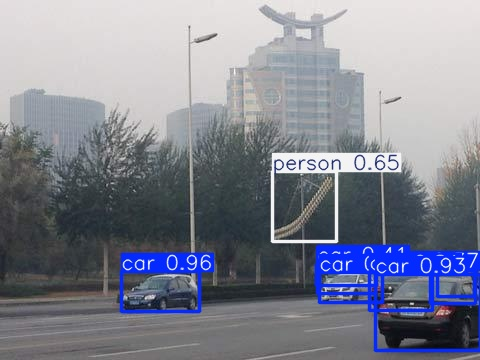

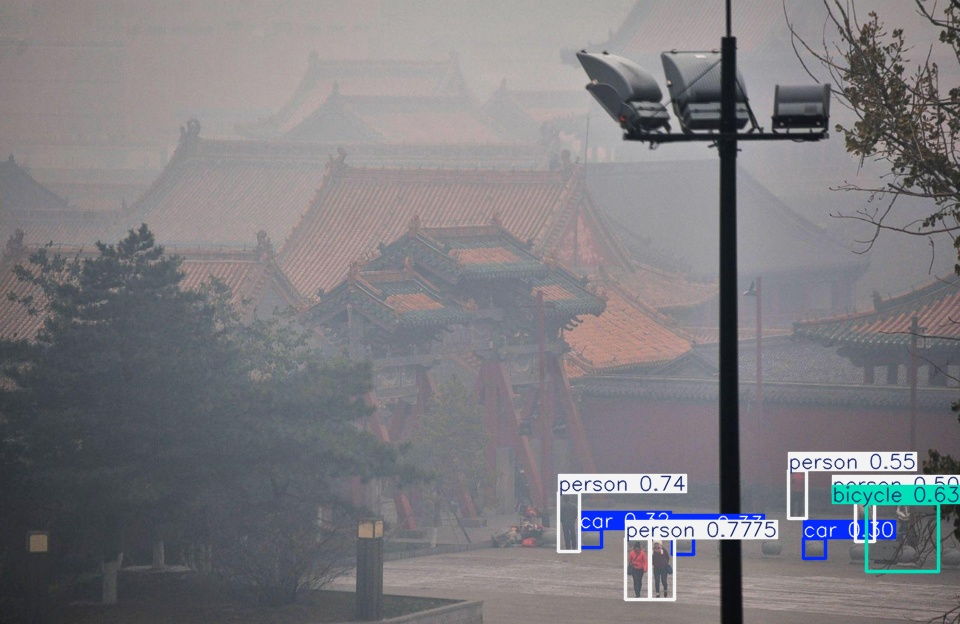

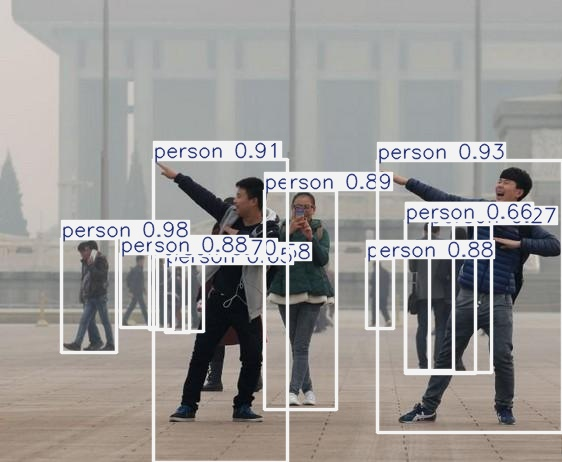

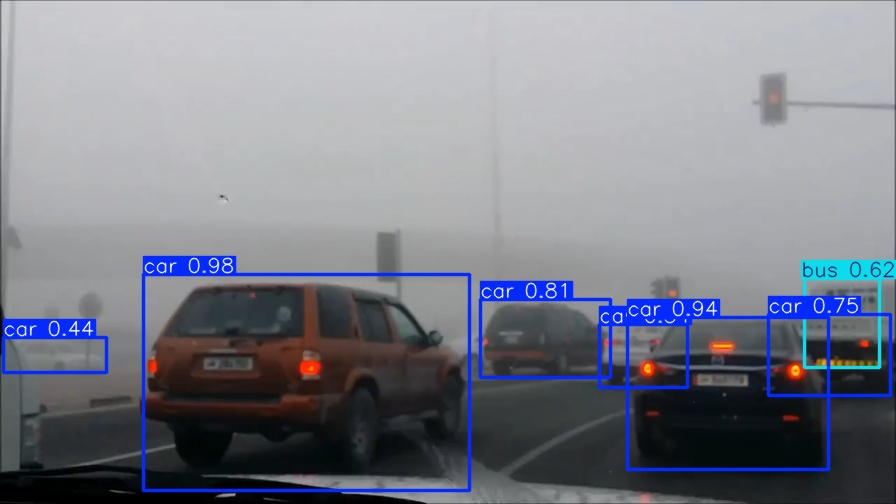

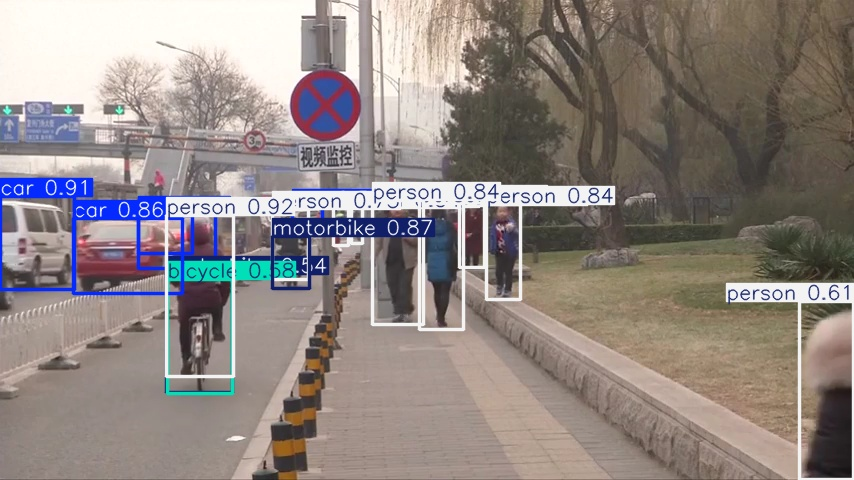

In [ ]:
import os
from IPython.display import Image, display

# Path to the folder where prediction images are saved
predicted_images_path = "/content/ultralytics/runs/detect/predict"

# List all image files in that directory
image_files = [f for f in os.listdir(predicted_images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display the first 5 prediction images (you can change this number)
for image_name in image_files[:5]:
    image_path = os.path.join(predicted_images_path, image_name)
    display(Image(filename=image_path))

In [ ]:
!yolo task=detect mode=val model=/content/best_model.pt data=/content/datasets/data.yaml

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1868.6±1110.7 MB/s, size: 121.9 KB)
val: Scanning /content/datasets/labels/val.cache... 1755 images, 0 backgrounds, 2 corrupt: 100% 1755/1755 [00:00<?, ?it/s]
val: /content/datasets/images/val/hv2_10.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1026]
val: /content/datasets/images/val/hv2_16.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0972]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 110/110 [00:29<00:00,  3.76it/s]
                   all       1753      17217      0.679      0.547      0.595      0.381
                   car       1202      10621      0.815      0.727      0.809      0.531
                   bus        479       1034      0.

## Now we are trying other versions of YOLO.

## Yolov9


In [ ]:
# Install ultralytics (YOLOv9 inside latest version)
!pip install ultralytics --upgrade --quiet

# (Optional) Install extra libraries
!pip install onnx onnxruntime --quiet

from IPython.display import clear_output
clear_output()
print("✅ YOLOv9 Installed!")

✅ YOLOv9 Installed!


In [ ]:
# from ultralytics import YOLO

# Train YOLOv9
!yolo task=detect mode=train model=yolov9c.pt data=/content/datasets/data.yaml epochs=3 imgsz=640 batch=16 device=0

100% 49.4M/49.4M [00:00<00:00, 272MB/s]
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/datasets/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
# Save best model manually (optional)
!cp runs/detect/train/weights/best.pt /content/best_yolov9_model.pt
print("✅ Saved as /content/best_yolov9_model.pt")

✅ Saved as /content/best_yolov9_model.pt


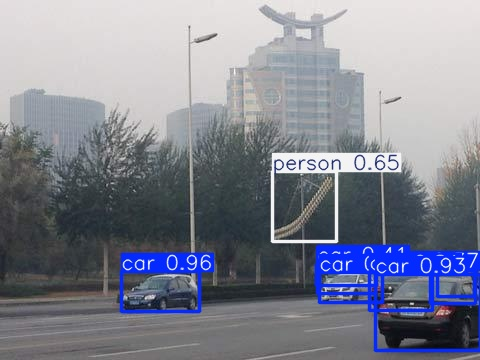

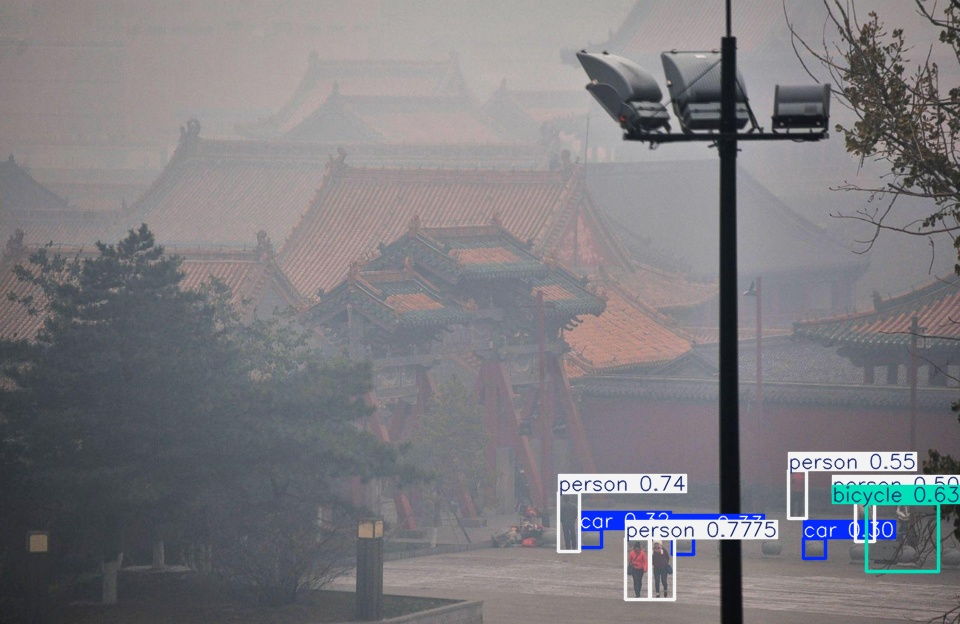

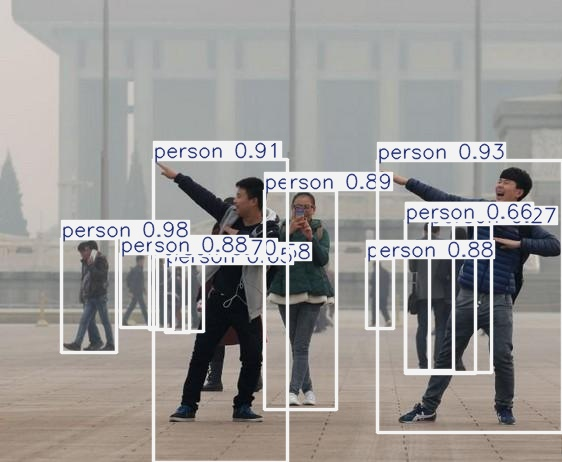

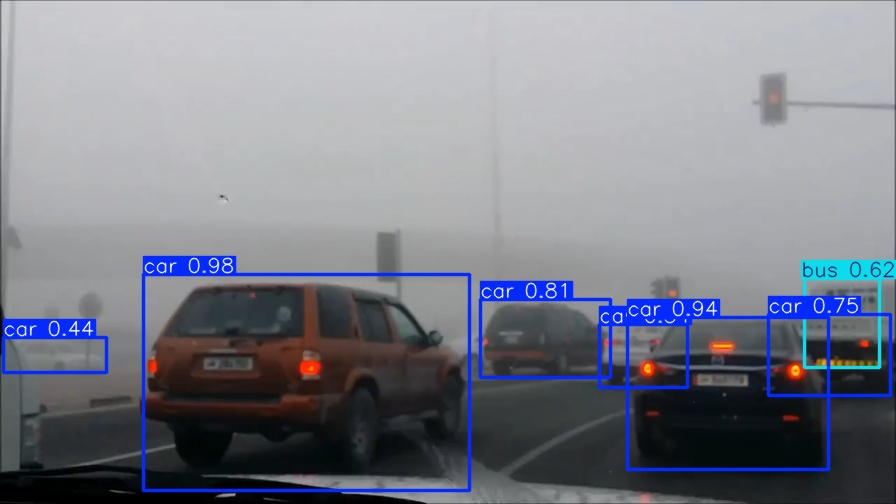

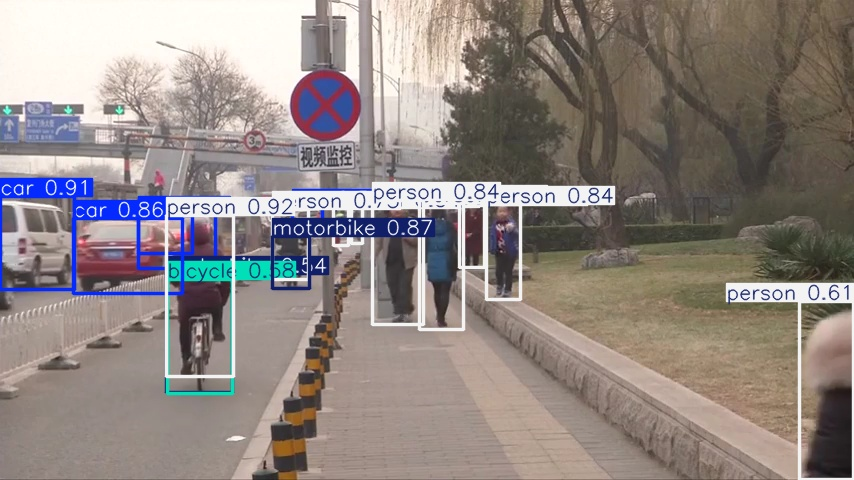

In [ ]:
import os
from IPython.display import Image, display

predicted_path = "/content/ultralytics/runs/detect/predict"
predicted_images = [f for f in os.listdir(predicted_path) if f.endswith(('.jpg', '.png'))]

for img_name in predicted_images[:5]:  # Show first 5 images
    img_path = os.path.join(predicted_path, img_name)
    display(Image(filename=img_path))

In [ ]:
# YOLOv8 Prediction
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train/weights/best.pt source=/content/datasets/images/test save=True

# YOLOv9 Prediction
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train2/weights/best.pt source=/content/datasets/images/test save=True

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1733 /content/datasets/images/test/AM_Bing_211.png: 384x640 3 persons, 38.5ms
image 2/1733 /content/datasets/images/test/AM_Bing_232.png: 416x640 10 cars, 1 bus, 3 persons, 1 bicycle, 37.5ms
image 3/1733 /content/datasets/images/test/AM_Bing_242.png: 384x640 2 persons, 11.4ms
image 4/1733 /content/datasets/images/test/AM_Bing_243.png: 352x640 1 person, 2 bicycles, 42.2ms
image 5/1733 /content/datasets/images/test/AM_Bing_318.png: 448x640 13 cars, 1 bus, 52.9ms
image 6/1733 /content/datasets/images/test/AM_Bing_422.png: 544x640 6 persons, 1 motorbike, 39.1ms
image 7/1733 /content/datasets/images/test/AM_Bing_640.png: 416x640 1 car, 7 persons, 13.3ms
image 8/1733 /content/datasets/images/test/AM_Bing_727.png: 480x640 15 persons, 39.4ms
image 9/1733 /content/datasets/images/test/AM_Google_019.png: 448x640 4 cars, 2 pe

## Yolov10

In [ ]:
# Train YOLOv10
!yolo task=detect mode=train model=yolov10s.pt data=/content/datasets/data.yaml epochs=3 imgsz=640 batch=16 device=0

100% 15.9M/15.9M [00:00<00:00, 148MB/s]
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/datasets/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

In [ ]:
# Save best model manually (optional) for YOLOv10
!cp /content/ultralytics/runs/detect/train/weights/best.pt /content/best_yolov10_model.pt
print("✅ Saved as /content/best_yolov10_model.pt")

✅ Saved as /content/best_yolov10_model.pt


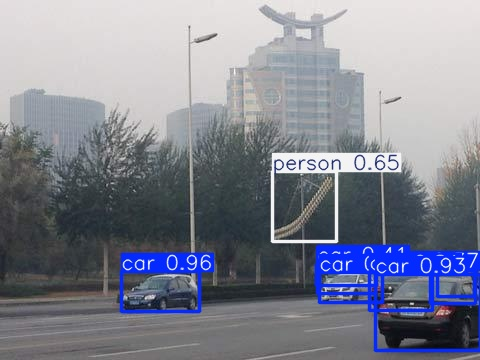

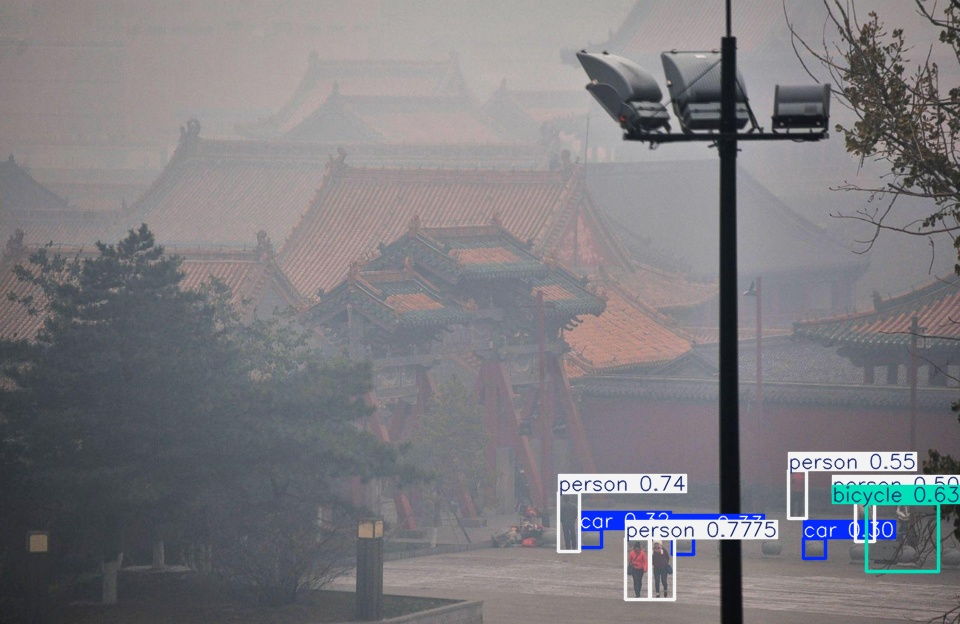

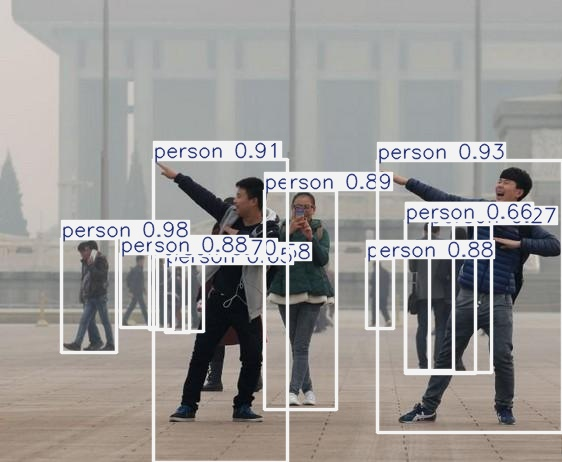

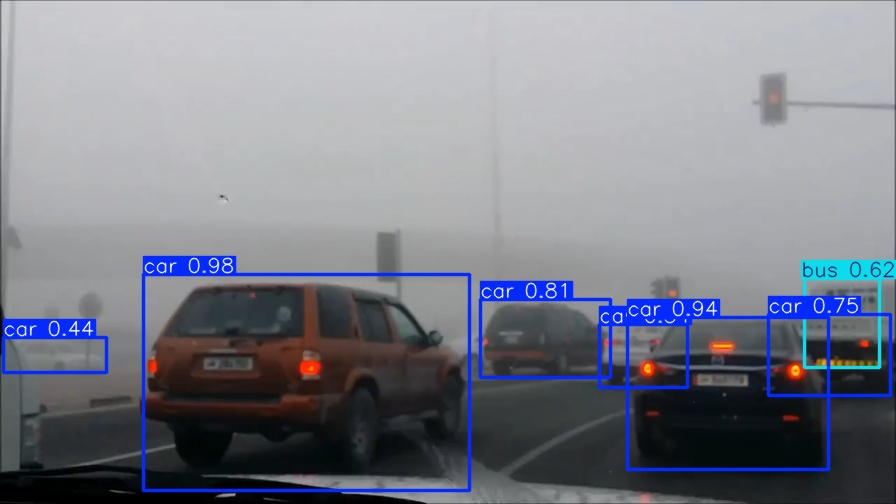

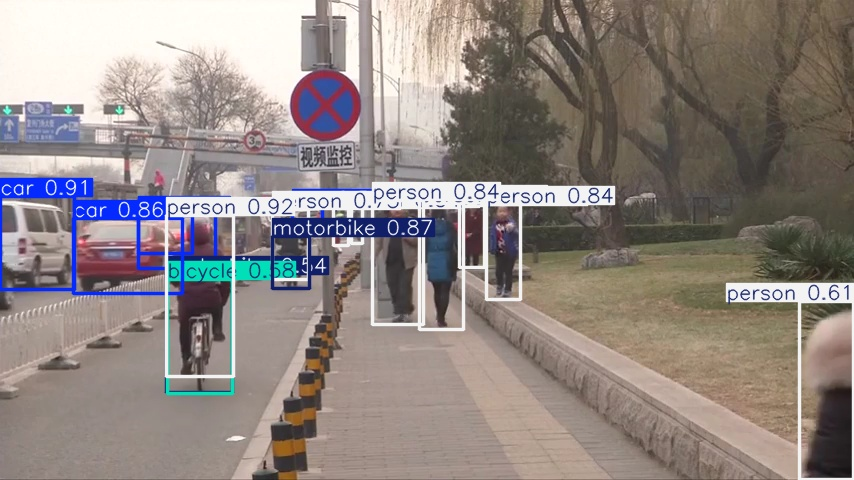

In [ ]:
import os
from IPython.display import Image, display

# Folder containing YOLOv10 predicted images
predicted_path = "/content/ultralytics/runs/detect/predict"

# List all jpg and png images
predicted_images = [f for f in os.listdir(predicted_path) if f.endswith(('.jpg', '.png'))]

# Display first 5 predicted images
for img_name in predicted_images[:5]:
    img_path = os.path.join(predicted_path, img_name)
    display(Image(filename=img_path))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
yolo8_results = pd.read_csv('/content/ultralytics/runs/detect/train/results.csv')   # YOLOv8
yolo9_results = pd.read_csv('/content/ultralytics/runs/detect/train2/results.csv')  # YOLOv9
yolo10_results = pd.read_csv('/content/ultralytics/runs/detect/train3/results.csv') # YOLOv10

# Last epoch values
yolo8_last = yolo8_results.iloc[-1]
yolo9_last = yolo9_results.iloc[-1]
yolo10_last = yolo10_results.iloc[-1]

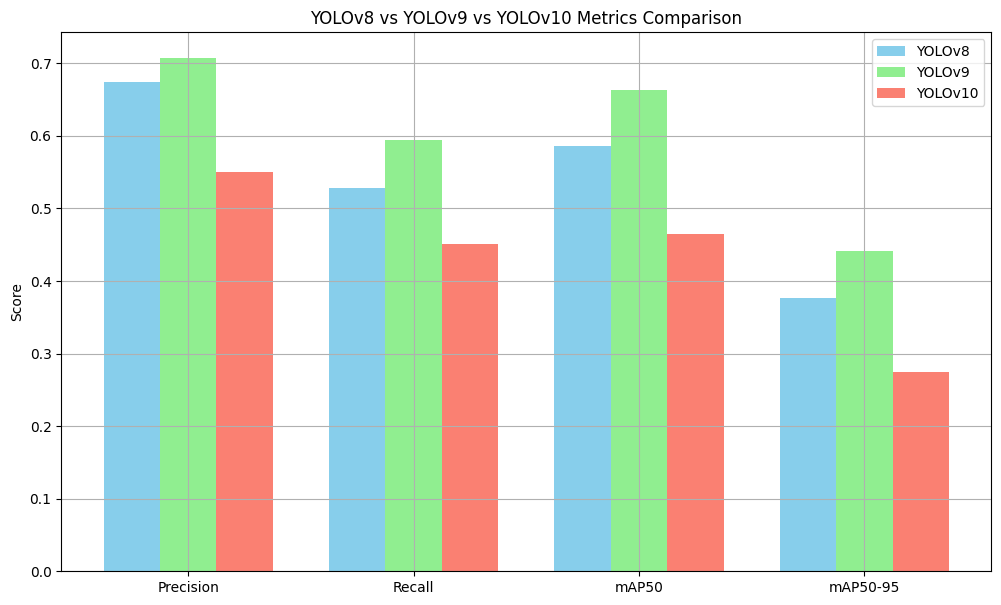

In [ ]:
# Metrics to compare (correct names)
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

yolo8_scores = [yolo8_last[m] for m in metrics]
yolo9_scores = [yolo9_last[m] for m in metrics]
yolo10_scores = [yolo10_last[m] for m in metrics]

# Plot bar chart
x = range(len(metrics))

plt.figure(figsize=(12,7))
plt.bar([p-0.25 for p in x], yolo8_scores, width=0.25, label='YOLOv8', color='skyblue')
plt.bar(x, yolo9_scores, width=0.25, label='YOLOv9', color='lightgreen')
plt.bar([p+0.25 for p in x], yolo10_scores, width=0.25, label='YOLOv10', color='salmon')

plt.xticks(x, ['Precision', 'Recall', 'mAP50', 'mAP50-95'])
plt.ylabel('Score')
plt.title('YOLOv8 vs YOLOv9 vs YOLOv10 Metrics Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming you have dataframes yolo8_results, yolo9_results, yolo10_results
yolo8_epochs = yolo8_results['epoch']
yolo9_epochs = yolo9_results['epoch']
yolo10_epochs = yolo10_results['epoch']

yolo8_losses = yolo8_results['train/box_loss']
yolo9_losses = yolo9_results['train/box_loss']
yolo10_losses = yolo10_results['train/box_loss']

YOLOv8 epochs: 1, YOLOv8 losses: 1
YOLOv9 epochs: 3, YOLOv9 losses: 3
YOLOv10 epochs: 1, YOLOv10 losses: 1


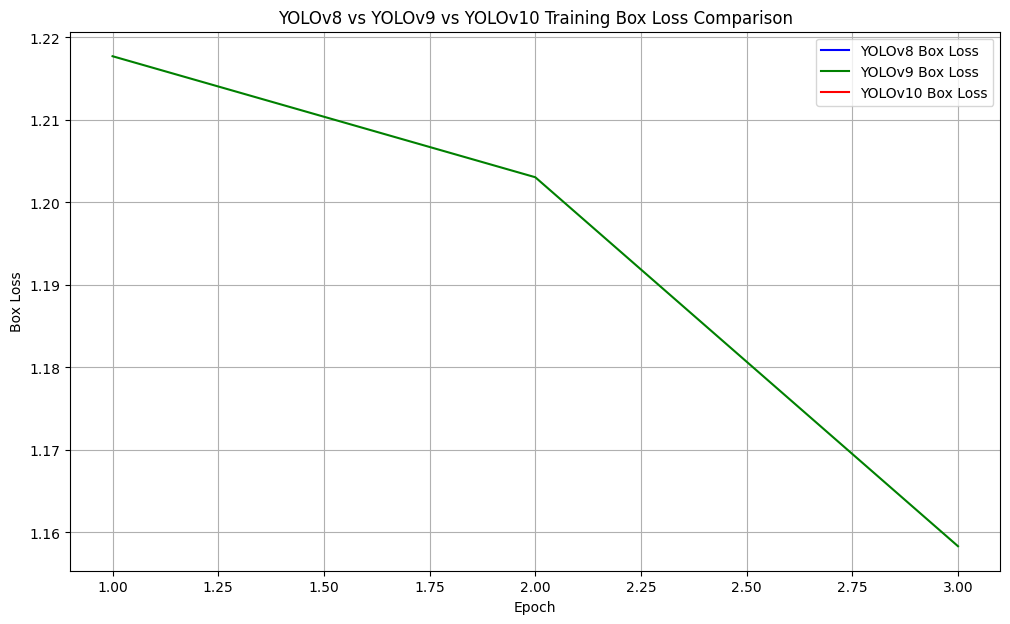

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check the lengths again
print(f"YOLOv8 epochs: {len(yolo8_epochs)}, YOLOv8 losses: {len(yolo8_losses)}")
print(f"YOLOv9 epochs: {len(yolo9_epochs)}, YOLOv9 losses: {len(yolo9_losses)}")
print(f"YOLOv10 epochs: {len(yolo10_epochs)}, YOLOv10 losses: {len(yolo10_losses)}")

# Plot the box loss values for each YOLO version
plt.figure(figsize=(12, 7))

# Plot for YOLOv8, YOLOv9, YOLOv10
plt.plot(yolo8_epochs, yolo8_losses, label='YOLOv8 Box Loss', color='blue')
plt.plot(yolo9_epochs, yolo9_losses, label='YOLOv9 Box Loss', color='green')
plt.plot(yolo10_epochs, yolo10_losses, label='YOLOv10 Box Loss', color='red')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('YOLOv8 vs YOLOv9 vs YOLOv10 Training Box Loss Comparison')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()